In [30]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

# EDA DATASET USER

A continuación se procede a extraer la base de datos "User" para verificar su contendio y poder iniciar el exploratorio.

In [31]:
df_user = pd.read_parquet(r'C:\GitHub\Bases\Grupal_Henry\Yelp\user-001.parquet')

In [32]:
df_user.columns # Para visualizar las columnas

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [33]:
df_user.head(3) # Para visualizar los datos que tenemos de la base de usuarios


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18


In [34]:
df_user.shape

(2105597, 22)

In [35]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [36]:
df_user.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06
mean,2.846875e+01,5.516853e+01,2.267667e+01,3.143013e+01,1.913746e+00,3.641863e+00,2.444596e+00,3.968618e-01,2.532631e-01,1.858665e-01,9.631663e-02,1.921464e+00,4.124809e+00,3.805567e+00,3.805567e+00,1.459133e+00,1.499514e+00
std,1.042146e+02,7.388068e+02,4.628811e+02,6.379274e+02,2.436510e+01,1.159519e+00,7.963704e+01,1.405658e+01,1.767698e+01,1.170051e+01,1.049796e+01,6.177753e+01,1.364953e+02,1.057484e+02,1.057484e+02,3.676692e+01,9.607754e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.900000e+01,1.500000e+01,3.000000e+00,4.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


In [37]:
df_user.isnull().sum() 

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

Este dataset contiene **2,105,597 usuarios** de Yelp con **22 columnas**.  

#### Principales características:  
- **Identificación:** `user_id`, `name`  
- **Actividad:** `review_count`, `yelping_since`, `friends`, `elite`  
- **Interacciones:** `useful`, `funny`, `cool`, `fans`, `average_stars`  
- **Compromiso:** `compliment_hot`, `compliment_more`, etc.  

**Conclusión:** Permite analizar el **comportamiento de los usuarios** y su impacto en la comunidad. 🚀  


## Análisis: Gráfico Usuarios con Más Reseñas  

<Axes: xlabel='name'>

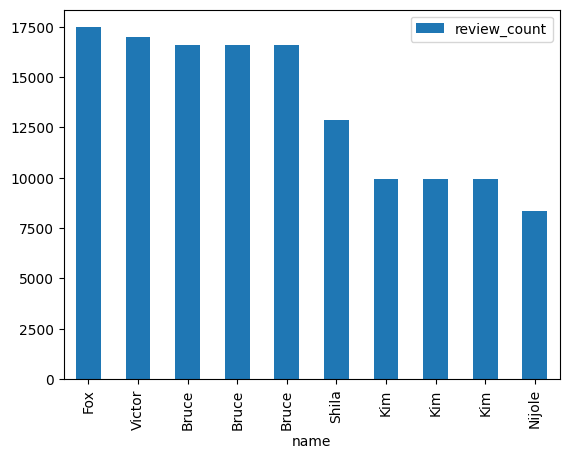

In [38]:
df_user.nlargest(10, 'review_count')[['name', 'review_count']].plot(kind='bar', x='name', y='review_count')


El gráfico de barras muestra los **usuarios con más reseñas en Yelp**.  

- **Fox** es el usuario con más reseñas, seguido por **Victor** y varios usuarios llamados **Bruce**.  
- **Shila, Kim y Nijole** tienen menos reseñas en comparación con los primeros usuarios.  
- **El nombre "Kim" aparece varias veces**, lo que podría indicar múltiples usuarios con el mismo nombre.  

## Analisis: Relación entre Fans y Calificación Promedio  

<Axes: xlabel='fans', ylabel='average_stars'>

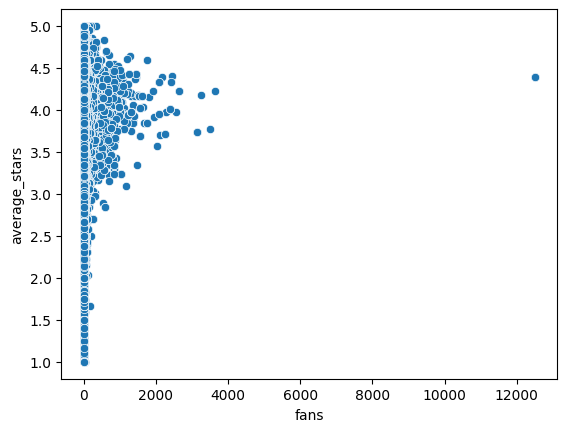

In [39]:
sns.scatterplot(data=df_user, x='fans', y='average_stars')

El gráfico de dispersión muestra la relación entre la cantidad de **fans** y la **calificación promedio** de los usuarios en Yelp.  

###  Observaciones  
- La mayoría de los usuarios tienen **menos de 2000 fans** y una calificación promedio entre **3.5 y 5 estrellas**.  
- Hay un **usuario atípico** con más de **12,000 fans**, lo que sugiere una gran influencia en la plataforma.  
- No hay una correlación clara entre tener más fans y una mejor calificación promedio.  

**Conclusión**: La cantidad de fans no necesariamente influye en la calificación promedio de un usuario.

## Analisis: Relación entre Fans y Calificación Promedio (Sin Outlier)

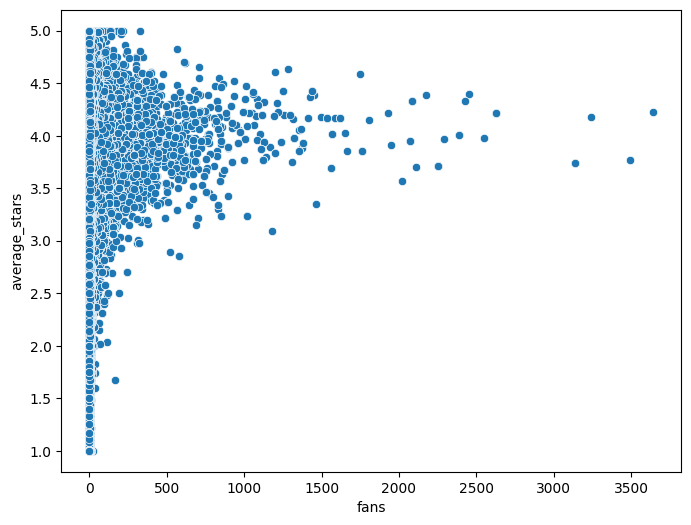

In [40]:
# Se observa un outlier, quiero eliminarlo para visualizar mejor la dispersión
df_user_clean = df_user[df_user['fans'] <= 4500]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_user_clean, x='fans', y='average_stars')
plt.show()


Este gráfico de dispersión muestra la relación entre la cantidad de **fans** y la **calificación promedio** de los usuarios en Yelp, después de eliminar un outlier con más de **12,000 fans**.  

### Observaciones  
- La mayoría de los usuarios tienen **menos de 500 fans**, con una calificación promedio entre **3.5 y 5 estrellas**.  
- Aún existen algunos usuarios con más de **3000 fans**, pero en menor cantidad.  
- La distribución sigue mostrando que **tener más fans no garantiza una mejor calificación promedio**.  

**Conclusión:** Al eliminar el outlier extremo, la distribución sigue siendo similar, indicando que la calificación promedio es independiente del número de fans.

## Análisis: Mapa de Calor de Correlaciones

<Axes: >

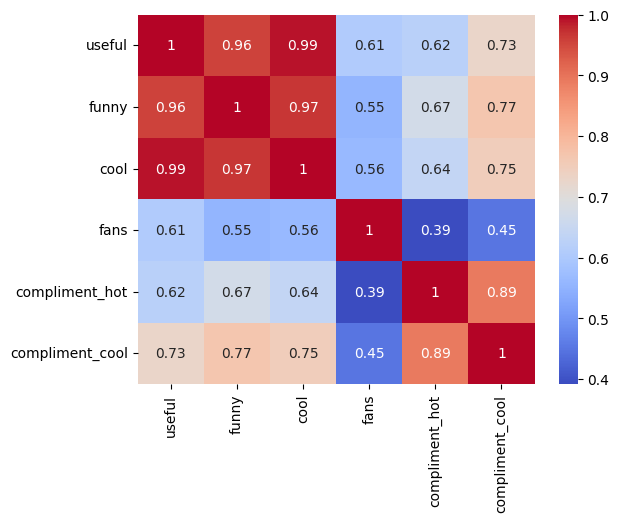

In [41]:
sns.heatmap(df_user[['useful', 'funny', 'cool', 'fans', 'compliment_hot', 'compliment_cool']].corr(), annot=True, cmap='coolwarm')

Este mapa de calor muestra la **correlación** entre diferentes variables en los datos de usuarios de Yelp. Los valores más cercanos a **1** indican una relación fuerte y positiva, mientras que los valores cercanos a **0** indican poca o ninguna relación.  

### Observaciones  
- Existe una **fuerte correlación** entre `useful`, `funny` y `cool` (≥ 0.96), lo que indica que los usuarios que reciben votos en una categoría tienden a recibirlos en las otras también.  
- `fans` tiene una correlación **moderada** con `useful`, `funny` y `cool` (~0.55-0.61), lo que sugiere que los usuarios más influyentes tienden a recibir más interacciones.  
- `compliment_hot` y `compliment_cool` tienen una **fuerte correlación** (0.89), indicando que los usuarios que reciben un tipo de cumplido suelen recibir el otro también.  
- `fans` tiene la correlación más baja con `compliment_hot` (0.39), lo que implica que la cantidad de fans no está fuertemente relacionada con recibir cumplidos de este tipo.  

**Conclusión:** Las interacciones entre los usuarios de Yelp siguen un **patrón predecible** donde aquellos que reciben votos en una categoría (como `funny`) también los reciben en otras (`useful`, `cool`). Sin embargo, la cantidad de `fans` no es un factor determinante en recibir ciertos tipos de cumplidos.

In [42]:
#df_user['yelping_since_year'].value_counts().sort_index().plot(kind='line')